In [11]:
#problem 1
#4. Suppose an interactive system is supporting 100 users with 15 second think times and a 
#system throughput of 5 interactions/second. 
#a. What is the response time of the system? 
think = 15  #seconds (Z)
users = 100
rate = 5  #interaction/second

response = users/rate - think
print("Response time for a = ", response, "(s)")

#b. Suppose that the service demands of the workload evolve over time so that system throughput drops to 50% 
#of its former value (i.e., to 2.5 interactions/second). Assuming that there still are 100 users with 15 second 
#think times, what would their response time be?

rate = 2.5
response = users/rate - think
print("Response time for b = ", response, "(s)")

#c. How do you account for the fact that response time in (b) is more than twice as large as that in (a)? 

print('''There are a lot of users and they form a queue which slows things down. 
      As the utilization gets\n near 100 the response time will increase significantly''')


Response time for a =  5.0 (s)
Response time for b =  25.0 (s)
There are a lot of users and they form a queue which slows things down. 
      As the utilization gets
 near 100 the response time will increase significantly


In [12]:
#Problem 2
#Part 1 - Visit Count
print("Proxy visits per packet = ", 0.7+2*0.3)
v_proxy = 0.7+2*0.3
print("Router visits per packet = ", 2*0.3)
v_router = 2*0.3
print("A visits per packet = ", 0.3*0.5)
v_A = 0.3*0.5
print("B visits per packet = ", 0.3*0.5)
v_B = 0.3*0.5

Proxy visits per packet =  1.2999999999999998
Router visits per packet =  0.6
A visits per packet =  0.15
B visits per packet =  0.15


In [21]:
#Part 2 - Demand
#times in (s)
ser_proxy = 0.010
ser_router = 0.005
ser_A = 0.150
ser_B = 0.100
dem_proxy = ser_proxy*v_proxy
dem_router = ser_router*v_router
dem_A = ser_A*v_A
dem_B = ser_B*v_B

#Add in transmission time to total demand
dem_total = dem_proxy+dem_router+dem_A+dem_B+0.036*2*0.3

#Unit for demand = (visits*seconds)/packet
print("Proxy demand = ", dem_proxy, "(visits*seconds)/packet")
print("Router demand = ", dem_router)
print("A demand = ", dem_A)
print("B demand = ", dem_B)
print("Total demand = ", dem_total)
dem_max = max(dem_proxy,dem_router,dem_A,dem_B)
print("Max demand = ", dem_max)

Proxy demand =  0.012999999999999998 (visits*seconds)/packet
Router demand =  0.003
A demand =  0.0225
B demand =  0.015
Total demand =  0.07509999999999999
Max demand =  0.0225


N* =  14.44888888888889


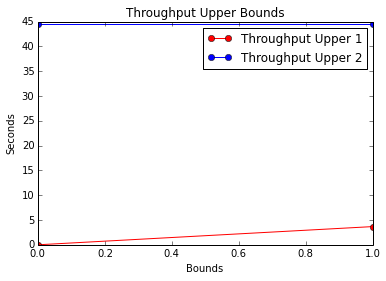

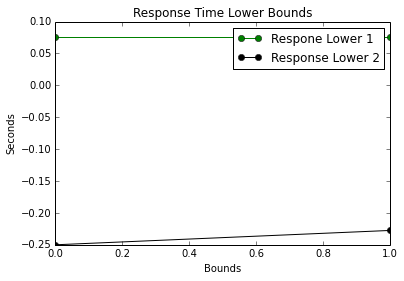

In [28]:
#Part 3 
#Examine case study 5.3.1 for the process of calculating the job bounds, 
#and calculate the upper bounds on throughput (X) and the lower bounds on response time (R). 
#Write the bounds down and also graph those bounds (two lines for each).
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

-

Proxy demand =  0.012999999999999998 (visits*seconds)/packet
Router demand =  0.003
A demand =  0.015
B demand =  0.015
Total demand =  0.0676
Max demand =  0.015
N* =  21.173333333333332


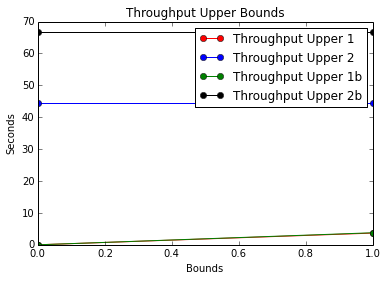

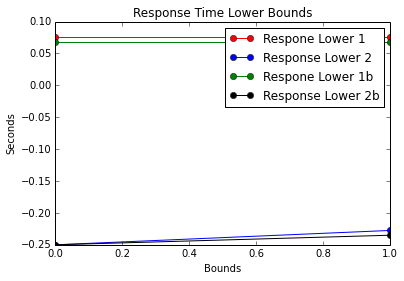

In [29]:
#Part 4
#Modify the model in a method similar to 5.3.3 of the QSP text. 
#In your case, assume that the two origin servers are of equal performance. 
#Write down the bounds equations and graph them again, overlaying them with the original bounds from part 3.

#Change response time to 100ms for both A and B
#Part 2 - Demand
#times in (s)
ser_proxy = 0.010
ser_router = 0.005
ser_A = 0.100
ser_B = 0.100
dem_proxy = ser_proxy*v_proxy
dem_router = ser_router*v_router
dem_A = ser_A*v_A
dem_B = ser_B*v_B

#Add in transmission time to total demand
dem_total = dem_proxy+dem_router+dem_A+dem_B+0.036*2*0.3

#Unit for demand = (visits*seconds)/packet
print("Proxy demand = ", dem_proxy, "(visits*seconds)/packet")
print("Router demand = ", dem_router)
print("A demand = ", dem_A)
print("B demand = ", dem_B)
print("Total demand = ", dem_total)
dem_max = max(dem_proxy,dem_router,dem_A,dem_B)
print("Max demand = ", dem_max)

#Calculate N*
think_time = 0.250 #(s)
N_star = (dem_total + think_time)/dem_max
print("N* = ", N_star)

#Optimistic bounds throughput
opt_1 = [0,0]
opt_2 = [1,1/(dem_max+think_time)]
line0b_x = [0,1]
line0b_y = [0,1/(dem_max+think_time)]

opt_3 = [0,1/dem_max]
opt_4 = [1,1/dem_max]
line1b_x = [0,1]
line1b_y = [1/dem_max, 1/dem_max]

#Response bounds
res_1 = [0, dem_total]
res_2 = [1, dem_total]
line2b_x = [0, 1]
line2b_y = [dem_total,dem_total]

res_3 = [0, -think_time]
res_4 = [1, dem_max-think_time]
line3b_x = [0,1]
line3b_y = [-think_time,dem_max-think_time]

line0, = plt.plot(line0_x, line0_y, 'ro-')
line1, = plt.plot(line1_x, line1_y, 'bo-')
line2, = plt.plot(line0b_x, line0b_y, 'go-')
line3, = plt.plot(line1b_x, line1b_y, 'ko-')

#title and axis labels
plt.xlabel('Bounds')
plt.ylabel('Seconds')
plt.title("Throughput Upper Bounds")
#legend
plt.legend([line0, line1, line2, line3], 
  ['Throughput Upper 1', 'Throughput Upper 2', 'Throughput Upper 1b', 'Throughput Upper 2b'], loc=1)
plt.show()

line0, = plt.plot(line2_x, line2_y, 'ro-')
line1, = plt.plot(line3_x, line3_y, 'bo-')
line2, = plt.plot(line2b_x, line2b_y, 'go-')
line3, = plt.plot(line3b_x, line3b_y, 'ko-')

#title and axis labels
plt.xlabel('Bounds')
plt.ylabel('Seconds')
plt.title("Response Time Lower Bounds")
#legend
plt.legend([line0, line1, line2, line3], 
  ['Respone Lower 1', 'Response Lower 2', 'Respone Lower 1b', 'Response Lower 2b'], loc=1)
plt.show()

Dem_ave, N+batch, N+terminal
0.0115 16.0285714286 25.107199117


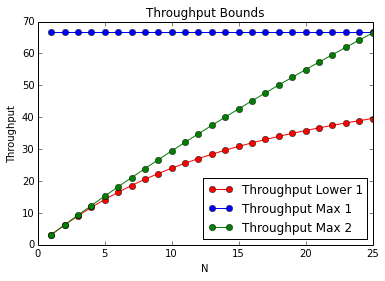

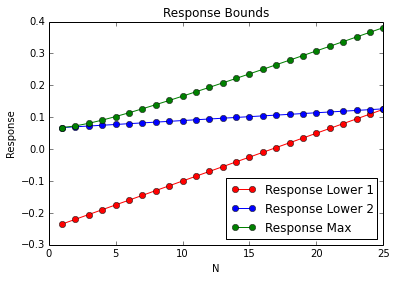

In [39]:
#Part 5
#Now, determine the lower bounds on throughput (X) and the upper bounds on response time (R) 
#for the original system using the balanced job bounds equations summarized in Table 5.2. 
#Produce a single graph with the upper and lower bounds of X and R.

dem_ave = np.mean([dem_proxy,dem_router,dem_A,dem_B])

N_batch = (dem_total-dem_ave)/(dem_max-dem_ave)
N_terminal = ((dem_total+think_time)**2-dem_total*dem_ave)/((dem_total+think_time)*dem_max-dem_total*dem_ave)

print("Dem_ave, N+batch, N+terminal")
print(dem_ave, N_batch, N_terminal)

#Throughput
def terminal_t_min(N):
    output = N/(dem_total+think_time+((N-1)*dem_max)/(1+think_time/(N*dem_total)))
    return output 

def terminal_t_max1(N):
    return 1/dem_max

def terminal_t_max2(N):
    output = N/(dem_total+think_time+((N-1)*dem_ave)/(1+think_time/(dem_total)))
    return output

N = []
min1 = []
max1 = []
max2 = []
for ii in range(1,int(N_terminal+1)):
    N.append(ii)
    min1.append(terminal_t_min(ii))
    max1.append(terminal_t_max1(ii))
    max2.append(terminal_t_max2(ii))

line0, = plt.plot(N, min1, 'ro-')
line1, = plt.plot(N, max1, 'bo-')
line2, = plt.plot(N, max2, 'go-')

#title and axis labels
plt.xlabel('N')
plt.ylabel('Throughput')
plt.title("Throughput Bounds")
#legend
plt.legend([line0, line1, line2, line3], 
  ['Throughput Lower 1', 'Throughput Max 1', 'Throughput Max 2'], loc=4)
plt.show()


#Response Time
def terminal_r_min1(N):
    return N*dem_max-think_time

def terminal_r_min2(N):
    return dem_total+((N-1)*dem_ave)/(1+think_time/dem_total)

def terminal_r_max(N):
    return dem_total+((N-1)*dem_max)/(1+think_time/(N*dem_total))

rmin1 = []
rmin2 = []
rmax = []
for ii in range(1,int(N_terminal+1)):
    rmin1.append(terminal_r_min1(ii))
    rmin2.append(terminal_r_min2(ii))
    rmax.append(terminal_r_max(ii))
    
line0, = plt.plot(N, rmin1, 'ro-')
line1, = plt.plot(N, rmin2, 'bo-')
line2, = plt.plot(N, rmax, 'go-')

#title and axis labels
plt.xlabel('N')
plt.ylabel('Response')
plt.title("Response Bounds")
#legend
plt.legend([line0, line1, line2, line3], 
  ['Response Lower 1', 'Response Lower 2', 'Response Max'], loc=4)
plt.show()

In [114]:
#Problem 3
#You will use the Vi and Di from the prior problem.

v_proxy = 0.7+2*0.3
v_router = 2*0.3
v_A = 0.3*0.5
v_B = 0.3*0.5

#times in (s)
ser_proxy = 0.010
ser_router = 0.005
ser_A = 0.150
ser_B = 0.100
dem_proxy = ser_proxy*v_proxy
dem_router = ser_router*v_router
dem_A = ser_A*v_A
dem_B = ser_B*v_B

#Add in transmission time to total demand
dem_total = dem_proxy+dem_router+dem_A+dem_B+0.036*2*0.3

#Unit for demand = (visits*seconds)/packet
dem_max = max(dem_proxy,dem_router,dem_A,dem_B)

#Write down the equations for the Response for the individual components for N customers in the system, 
#using the appropriate service times (again, in the PDF document) 
#and the Queue length for N-1 customers in the system

#residence times
#delay center = D_k
#queue center = D_k*(1+A_k(N))

#6.1 system throughput

Q_proxy = []
Q_router = []
Q_A = []
Q_B = []

r_proxy_l = []
r_router_l = []
r_A_l = []
r_B_l = []
r_PR_l = []

XX = []

K=5

for N in range(1):
    Q_proxy.append(Q_proxy_find(N))
    Q_router.append(Q_router_find(N))
    Q_A.append(Q_A_find(N))
    Q_B.append(Q_B_find(N))

#Utilization
def U(N):
    return (N+1)/(N+K)

#Service Center times
def r_proxy(N):
    if N==0:
        return dem_proxy
    return dem_proxy*(1+Q_proxy[N])

def r_router(N):
    if N==0:
        return dem_router
    return dem_router*(1+Q_router[N])

def r_A(N):
    if N==0:
        return dem_A
    return dem_A*(1+Q_A[N])

def r_B(N):
    if N==0:
        return dem_B
    return dem_B*(1+Q_B[N])

def r_PR_delay(N):
    return 0.036*2*0.3

def X(N):
    output = N/(think_time + (r_proxy_l[N]+r_router_l[N]+r_A_l[N]+r_B_l[N]+r_PR_l[N]))
    return output

#Queue times for service centers
def Q_proxy_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_proxy(N)

def Q_router_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_router(N)
    
def Q_A_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_A(N)

def Q_B_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_B(N)
    
def Q_PR_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_PR_delay(N)
    
    
class prettyfloat(float):
    def __repr__(self):
        return "%0.6f" % self

print("Problem 3 - Original Service Times")
print('''N, Qproxy,   Qrouter,  QA,       QB,       proxy,    router,   A,        B,        PR_delay, Throughput''')

for N in range(0,31):
    
    #
    r_proxy_l.append(r_proxy(N))
    r_router_l.append(r_router(N))
    r_A_l.append(r_A(N))
    r_B_l.append(r_B(N))
    r_PR_l.append(r_PR_delay(N))
        
    XX.append(X(N))
    
    Q_proxy.append(Q_proxy_find(N))
    Q_router.append(Q_router_find(N))
    Q_A.append(Q_A_find(N))
    Q_B.append(Q_B_find(N))
    
    print(N, [prettyfloat(x) for x in [Q_proxy[N], Q_router[N], Q_A[N], Q_B[N], \
          r_proxy_l[N], r_router_l[N], r_A_l[N], r_B_l[N], r_PR_l[N], XX[N]]] )
    


Problem 3 - Original Service Times
N, Qproxy,   Qrouter,  QA,       QB,       proxy,    router,   A,        B,        PR_delay, Throughput
0 [0.000000, 0.000000, 0.000000, 0.000000, 0.013000, 0.003000, 0.022500, 0.015000, 0.021600, 0.000000]
1 [0.200000, 0.200000, 0.200000, 0.200000, 0.015600, 0.003600, 0.027000, 0.018000, 0.021600, 2.977963]
2 [0.046456, 0.010721, 0.080405, 0.053603, 0.013604, 0.003032, 0.024309, 0.015804, 0.021600, 6.091075]
3 [0.082863, 0.018469, 0.148069, 0.096264, 0.014077, 0.003055, 0.025832, 0.016444, 0.021600, 9.063222]
4 [0.127585, 0.027692, 0.234117, 0.149035, 0.014659, 0.003083, 0.027768, 0.017236, 0.021600, 11.963696]
5 [0.175371, 0.036885, 0.332204, 0.206201, 0.015280, 0.003111, 0.029975, 0.018093, 0.021600, 14.790358]
6 [0.225994, 0.046008, 0.443335, 0.267602, 0.015938, 0.003138, 0.032475, 0.019014, 0.021600, 17.535399]
7 [0.279478, 0.055026, 0.569463, 0.333419, 0.016633, 0.003165, 0.035313, 0.020001, 0.021600, 20.189640]
8 [0.335819, 0.063902, 0.712955, 

In [116]:
#BALANCED SERVICE TIMES

#You will use the Vi and Di from the prior problem.

v_proxy = 0.7+2*0.3
v_router = 2*0.3
v_A = 0.3*0.5
v_B = 0.3*0.5

#times in (s)
ser_proxy = 0.010
ser_router = 0.005
ser_A = 0.100
ser_B = 0.100
dem_proxy = ser_proxy*v_proxy
dem_router = ser_router*v_router
dem_A = ser_A*v_A
dem_B = ser_B*v_B

#Add in transmission time to total demand
dem_total = dem_proxy+dem_router+dem_A+dem_B+0.036*2*0.3

#Unit for demand = (visits*seconds)/packet
dem_max = max(dem_proxy,dem_router,dem_A,dem_B)

#Write down the equations for the Response for the individual components for N customers in the system, 
#using the appropriate service times (again, in the PDF document) 
#and the Queue length for N-1 customers in the system

#residence times
#delay center = D_k
#queue center = D_k*(1+A_k(N))

#6.1 system throughput

Q_proxy = []
Q_router = []
Q_A = []
Q_B = []

r_proxy_l = []
r_router_l = []
r_A_l = []
r_B_l = []
r_PR_l = []

XX = []

K=5

for N in range(1):
    Q_proxy.append(Q_proxy_find(N))
    Q_router.append(Q_router_find(N))
    Q_A.append(Q_A_find(N))
    Q_B.append(Q_B_find(N))

#Utilization
def U(N):
    return (N+1)/(N+K)

#Service Center times
def r_proxy(N):
    return dem_proxy*(1+Q_proxy[N-1])

def r_router(N):
    return dem_router*(1+Q_router[N-1])

def r_A(N):
    return dem_A*(1+Q_A[N-1])

def r_B(N):
    return dem_B*(1+Q_B[N-1])

def r_PR_delay(N):
    return 0.036*2*0.3

def X(N):
    output = N/(think_time + (r_proxy_l[N]+r_router_l[N]+r_A_l[N]+r_B_l[N]+r_PR_l[N]))
    return output

#Queue times for service centers
def Q_proxy_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_proxy(N)

def Q_router_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_router(N)
    
def Q_A_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_A(N)

def Q_B_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_B(N)
    
def Q_PR_find(N):
    if N==0:
        return U(N)
    else:
        return X(N)*r_PR_delay(N)
    
    
class prettyfloat(float):
    def __repr__(self):
        return "%0.6f" % self

print("Problem 3 - Balanced Service Times (100ms each)")
print('''N, Qproxy,   Qrouter,  QA,       QB,       proxy,    router,   A,        B,        PR_delay, Throughput''')

for N in range(0,31):
    #
    r_proxy_l.append(r_proxy(N))
    r_router_l.append(r_router(N))
    r_A_l.append(r_B(N))
    r_B_l.append(r_A(N))
    r_PR_l.append(r_PR_delay(N))
    
    XX.append(X(N))
    
    Q_proxy.append(Q_proxy_find(N))
    Q_router.append(Q_router_find(N))
    Q_A.append(Q_A_find(N))
    Q_B.append(Q_B_find(N))
    
    print(N, [prettyfloat(x) for x in [Q_proxy[N], Q_router[N], Q_A[N], Q_B[N], \
          r_proxy_l[N], r_router_l[N], r_A_l[N], r_B_l[N], r_PR_l[N], XX[N]]] )
    

Problem 3 - Balanced Service Times (100ms each)
N, Qproxy,   Qrouter,  QA,       QB,       proxy,    router,   A,        B,        PR_delay, Throughput
0 [0.200000, 0.200000, 0.200000, 0.200000, 0.015600, 0.003600, 0.018000, 0.018000, 0.021600, 0.000000]
1 [0.200000, 0.200000, 0.200000, 0.200000, 0.015600, 0.003600, 0.018000, 0.018000, 0.021600, 3.059976]
2 [0.047736, 0.011016, 0.055080, 0.055080, 0.015600, 0.003600, 0.018000, 0.018000, 0.021600, 6.119951]
3 [0.095471, 0.022032, 0.110159, 0.110159, 0.013621, 0.003033, 0.015826, 0.015826, 0.021600, 9.377755]
4 [0.127730, 0.028443, 0.148414, 0.148414, 0.014241, 0.003066, 0.016652, 0.016652, 0.021600, 12.414187]
5 [0.176792, 0.038063, 0.206726, 0.206726, 0.014660, 0.003085, 0.017226, 0.017226, 0.021600, 15.441714]
6 [0.226383, 0.047643, 0.266002, 0.266002, 0.015298, 0.003114, 0.018101, 0.018101, 0.021600, 18.392819]
7 [0.281379, 0.057279, 0.332926, 0.332926, 0.015943, 0.003143, 0.018990, 0.018990, 0.021600, 21.298219]
8 [0.339557, 0.06693

In [118]:
#Problem 4

#Original SERVICE TIMES


v_proxy = 0.7+2*0.3
v_router = 2*0.3
v_A = 0.3*0.5
v_B = 0.3*0.5

#times in (s)
ser_proxy = 0.010
ser_router = 0.005
ser_A = 0.100
ser_B = 0.100
dem_proxy = ser_proxy*v_proxy
dem_router = ser_router*v_router
dem_A = ser_A*v_A
dem_B = ser_B*v_B

#Add in transmission time to total demand
dem_total = dem_proxy+dem_router+dem_A+dem_B+0.036*2*0.3

#Unit for demand = (visits*seconds)/packet
dem_max = max(dem_proxy,dem_router,dem_A,dem_B)

#Write down the equations for the Response for the individual components for N customers in the system, 
#using the appropriate service times (again, in the PDF document) 
#and the Queue length for N-1 customers in the system

#residence times
#delay center = D_k
#queue center = D_k*(1+A_k(N))

#6.1 system throughput

Q_proxy = []
Q_router = []
Q_A = []
Q_B = []

r_proxy_l = []
r_router_l = []
r_A_l = []
r_B_l = []
r_PR_l = []

XX = []

K=5

# h function selected
# h = ((N-1)/N)*Q[N]

#Service Center times
def r_proxy(N):
    if N==0:
        return dem_proxy
    return dem_proxy*(1+((N-1)/N)*Q_proxy[N-1])

def r_router(N):
    if N==0:
        return dem_router
    return dem_router*(1+((N-1)/N)*Q_router[N-1])

def r_A(N):
    if N==0:
        return dem_A
    return dem_A*(1+((N-1)/N)*Q_A[N-1])

def r_B(N):
    if N==0:
        return dem_B
    return dem_B*(1+((N-1)/N)*Q_B[N-1])

def r_PR_delay(N):
    return 0.036*2*0.3

def X(N):
    output = N/(think_time + (r_proxy_l[N]+r_router_l[N]+r_A_l[N]+r_B_l[N]+r_PR_l[N]))
    return output

#Queue times for service centers
def Q_proxy_find(N):
    if N==0:
        return 0
    elif N==1:
        return N/K
    else:
        return X(N)*r_proxy(N)

def Q_router_find(N):
    if N==0:
        return 0
    elif N==1:
        return N/K
    else:
        return X(N)*r_router(N)
    X(N)*r_A(N)
def Q_A_find(N):
    if N==0:
        return 0
    elif N==1:
        return N/K
    else:
        return X(N)*r_A(N)

def Q_B_find(N):
    if N==0:
        return 0
    elif N==1:
        return N/K
    else:
        return X(N)*r_B(N)
    
def Q_PR_find(N):
    if N==0:
        return 0
    elif N==1:
        return N/K
    else:
        return X(N)*r_PR_delay(N)
    
    
class prettyfloat(float):
    def __repr__(self):
        return "%0.6f" % self

print("Problem4 - Original Service Times")
print("h function - h=((N-1)/N)*Q")
print('''N, Qproxy,   Qrouter,  QA,       QB,       proxy,    router,   A,        B,        PR_delay, Throughput''')

for N in range(0,31):
    #
    r_proxy_l.append(r_proxy(N))
    r_router_l.append(r_router(N))
    r_A_l.append(r_B(N))
    r_B_l.append(r_A(N))
    r_PR_l.append(r_PR_delay(N))
    
    XX.append(X(N))
    
    Q_proxy.append(Q_proxy_find(N))
    Q_router.append(Q_router_find(N))
    Q_A.append(Q_A_find(N))
    Q_B.append(Q_B_find(N))
    
    print(N, [prettyfloat(x) for x in [Q_proxy[N], Q_router[N], Q_A[N], Q_B[N], \
          r_proxy_l[N], r_router_l[N], r_A_l[N], r_B_l[N], r_PR_l[N], XX[N]]] )
    


Problem4 - Original Service Times
h function - h=((N-1)/N)*Q
N, Qproxy,   Qrouter,  QA,       QB,       proxy,    router,   A,        B,        PR_delay, Throughput
0 [0.000000, 0.000000, 0.000000, 0.000000, 0.013000, 0.003000, 0.015000, 0.015000, 0.021600, 0.000000]
1 [0.200000, 0.200000, 0.200000, 0.200000, 0.013000, 0.003000, 0.015000, 0.015000, 0.021600, 3.148615]
2 [0.088765, 0.020484, 0.102421, 0.102421, 0.014300, 0.003300, 0.016500, 0.016500, 0.021600, 6.207325]
3 [0.128902, 0.028468, 0.150012, 0.150012, 0.013769, 0.003041, 0.016024, 0.016024, 0.021600, 9.361581]
4 [0.176940, 0.038028, 0.207109, 0.207109, 0.014257, 0.003064, 0.016688, 0.016688, 0.021600, 12.410947]
5 [0.228661, 0.047631, 0.269418, 0.269418, 0.014840, 0.003091, 0.017485, 0.017485, 0.021600, 15.408222]
6 [0.284044, 0.057243, 0.337093, 0.337093, 0.015477, 0.003119, 0.018368, 0.018368, 0.021600, 18.352458]
7 [0.343332, 0.066844, 0.410638, 0.410638, 0.016165, 0.003147, 0.019334, 0.019334, 0.021600, 21.239130]
8 [0.40